In [ ]:
# Dimension Reduction
# Code by Pascal Wallisch and Stephen Spivack
# Date: 11-30-21

In [ ]:
# In this lab, we will illustrate dimension reduction principles with a 
# toy - but real - example. Both in terms of use case and data.

# Example: Real student evaluation data from an NYU Department in the last year.

# Issue: We ask students a lot of questions per class. Many don't respond, so the
# response rate is low. This is a problem due to representativeness concerns. 

# Suspicion: It is low because a typical student has to answer close to a hundred 
# questions per semester if they take a handful of classes. 

# Question: Can we reduce the number of questions we ask? 

In [1]:
# 0. Load libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA

In [2]:
# 1a. Load course evaluation questions

# Load questions into dataframe (Latin-1 encoding = every character fits into a byte):
questions = pd.read_csv('evaluationQuestions.csv', encoding='latin-1', header=None)

# Display the questions:
print(questions.values)

[['Overall evaluation of the instructor(s).']
 ['Overall evaluation of the course.']
 ['The instructor(s) provided an environment that was conducive to learning.']
 ['The instructor(s) provided helpful feedback on assessed class components (e.g., exams, papers).']
 ['The course objectives were clearly stated.']
 ['The course was well organized.']
 ['The course was intellectually stimulating.']
 ['The course was effective at helping me learn.']
 ['The classes were informative.']
 ['The course was challenging.']
 ['The course increased my knowledge of the subject.']
 ['The instructor was effective at helping me learn.']
 ['The instructor encouraged student participation.']
 ['The instructor was effective at facilitating class discussion.']
 ['The instructor was open to studentsÕ questions and multiple points of view.']
 ['The instructor was accessible to students (e.g., via e-mail and office hours).']
 ['The instructor created an environment that promoted the success of students with  di

In [ ]:
# Looking at this, we can confirm that we ask a lot of these students.
# For instance, we ask both about the course and the instructor.
# Whether the students differentiate is an empirical question. 
# If they do, we should expect 2 factors, and if they don't, we shouldn't. 

In [3]:
# 1b. Load course evaluation data
data = np.genfromtxt('courseEvaluationData.csv', delimiter=',')

# We have data from 40 courses and 17 measures (variables) per course
data.shape 

(40, 17)

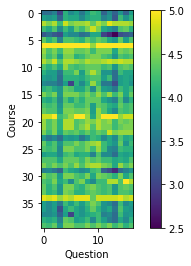

In [4]:
# 2. Looking at the raw data (Exploratory data analysis)
plt.imshow(data) # Display an image, i.e. data, on a 2D regular raster.
plt.xlabel('Question')
plt.ylabel('Course')
plt.colorbar()
plt.show() 

In [ ]:
# Some observations:

# 1) There is a lot of variability. This is a good thing. No variability --> Fail

# 2) We note that there are some courses (e.g. #7 or #35) where there is very
# little variability. Those happen to be courses with very low enrollment,
# so there isn't enough data (as per CLT) to be useful. We should probably
# exclude them. For now, we'll keep them.

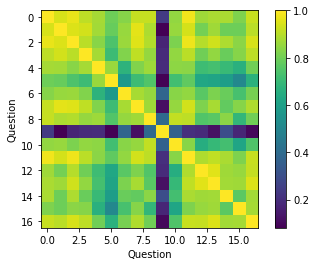

In [5]:
# 3. Compute and visualize the correlation matrix

# The reason this matters is so you can evalute the output of the PCA.
# Nothing in the PCA will not already be foreshadowed by this. 
# If there are clusters in the data here, there will be factors in the PCA

# Compute correlation between each measure across all courses:
# True = variables are rowwise; False = variables are columnwise
corrMatrix = np.corrcoef(data,rowvar=False) 

# Plot the data:
plt.imshow(corrMatrix) 
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()

In [ ]:
# Observation 1: Most variables are very highly correlated with each other
# Observation 2: There is probably going to be a 2nd factor, but that one
# will be very narrow, basically question 10
# Observation 3: There might be a 3rd factor, but it's not as clear, around
# question 6

In [6]:
# 4. Run the PCA

# You're in luck! There is a function that does it all in one.
# You will also learn that most machine learning algorithms can be
# implemented using scikit-learn: https://scikit-learn.org/stable/
# The catch here: PCA expects normally distributed DATA
# So that is why we z-score the data first

# 1. Z-score the data:
zscoredData = stats.zscore(data)

# 2. Initialize PCA object and fit to our data:
pca = PCA().fit(zscoredData)

# 3a. Eigenvalues: Single vector of eigenvalues in decreasing order of magnitude
eigVals = pca.explained_variance_

# 3b. Loadings (eigenvectors): Weights per factor in terms of the original data. Where do the
# principal components point, in terms of the 17 questions?
loadings = pca.components_

# 3c. Rotated Data: Simply the transformed data - we had 40 courses (rows) in
# terms of 17 variables (columns), now we have 40 courses in terms of 17
# factors ordered by decreasing eigenvalue
rotatedData = pca.fit_transform(zscoredData)

# 4. For the purposes of this, you can think of eigenvalues in terms of 
# (co)variance explained:
covarExplained = eigVals/sum(eigVals)*100

# Now let's display this for each factor:
for ii in range(len(covarExplained)):
    print(covarExplained[ii].round(3))

79.788
6.856
5.246
2.388
1.664
1.073
0.765
0.527
0.428
0.345
0.245
0.203
0.135
0.125
0.106
0.066
0.041


In [ ]:
# We note that there is a single factor (!) - something like class quality 
# or overall experience - that explains most (~80%) of the data.

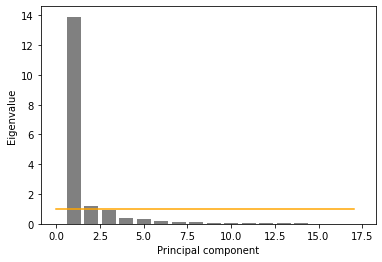

In [7]:
# 5. Scree plot

# It is up to the researcher how many factors to interpret meaningfully.
# All dimension reduction methods are exhaustive, i.e. if you put 17
# variables in, you get 17 factors back. If you put 100 variables in, you
# get 100 factors back. But these are not all created equal. Some explain a
# lot more of the covariability than others. 

# What a scree plot is: Plotting a bar graph of the sorted Eigenvalues
numClasses = 17
x = np.linspace(1,numClasses,numClasses)
plt.bar(x, eigVals, color='gray')
plt.plot([0,numClasses],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

In [8]:
# 6. There are 4 criteria by which people commonly pick the number of factors
# they interpret meaningfully:

# 1) Kaiser criterion: Keep all factors with an eigenvalue > 1
# Rationale: Each variable adds 1 to the sum of eigenvalues. The eigensum. 
# We expect each factor to explain at least as much as it adds to what needs
# to be explained. The factors have to carry their weight.
# By this criterion, we would report 2 meaningful factors. Generally speaking, this is
# a liberal criterion. You will end up with many factors, using this
# criterion. If you put in 256 EEG channels, 10 factors might exceed this threshold. 
threshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > threshold))

# 2) The "elbow" criterion: Pick only factors left of the biggest/sharpest
# drop. Here, this would yield 1 factor.
print('Number of factors selected by elbow criterion: 1')

# 3) Number of factors that account for 90% of the variance (Eigenvalues that 
# add up to 90% of the Eigensum. To account for at least 90% of the variability 
# in this data, we need 3 factors.
threshold = 90
eigSum = np.cumsum(covarExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)

# 4) "Horn's method". Simulate noise distributions to see which factors exceed
# what you would expect from noise. Resampling/Bootstrap-based. This is 
# explained in the Neural Data Science book, in the PCA chapter. 

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 3


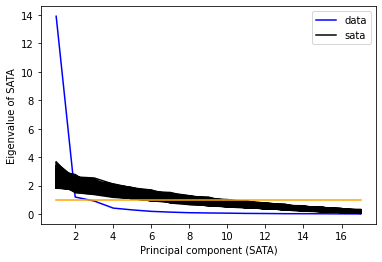

In [9]:
# Horn's parallel method (Horn, 1965) 
# As described on page 239 of the Neural Data Science book

# Remember: This method compares the eigenvalues generated from the data to the 
# eigenvalues generated from random sata - in this case, drawn randomly from a 
# standard normal distribution - of the same size.

# Initialize variables:
numDraws = int(1e4) # How many repetitions per resampling?
numRows = np.size(zscoredData,axis=0) # How many rows to recreate the dimensionality of the original data?
numColumns = np.size(zscoredData,axis=1) # How many columns to recreate the dimensionality of the original data?
eigSata = np.empty([numDraws,numColumns])*np.NaN # Initialize array to keep eigenvalues of sata

# Simulate null distribution of eigenvalues:
for ii in range(numDraws):
    # Randomly draw the sata from a standard normal distribution:
    sata = np.random.normal(0,1,[numRows,numColumns]) 
    # Run the PCA on the sata:
    pca = PCA().fit(sata)
    # Keep the eigenvalues:
    temp = pca.explained_variance_
    eigSata[ii] = temp
    
# That was fast. And we did it 10,000 times. I bet Horn would have loved to
# do that. He had to wait months for something like this.

# Make a plot of that and superimpose the real data on top of the sata:
plt.plot(x,eigVals,color='blue') # plot eigVals from our PCA
plt.plot(x,np.transpose(eigSata),color='black') # plot eigVals from eigSata
plt.plot([1,numColumns],[1,1],color='orange') # Kaiser criterion line
plt.xlabel('Principal component (SATA)')
plt.ylabel('Eigenvalue of SATA')
plt.legend(['data','sata'])
plt.show()

In [ ]:
# By this method, as you can see, only the first factor exceeds the noise
# distribution. If you want to be fancy, calculate the empirical confidence
# interval of the 10,000 SATA eigenfactors and note the empirical values that exceed it 

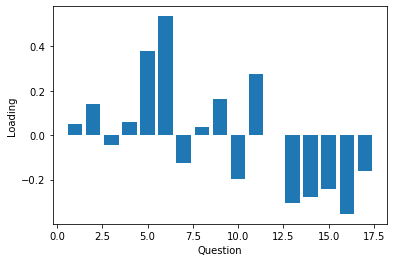

[['Overall evaluation of the instructor(s).']
 ['Overall evaluation of the course.']
 ['The instructor(s) provided an environment that was conducive to learning.']
 ['The instructor(s) provided helpful feedback on assessed class components (e.g., exams, papers).']
 ['The course objectives were clearly stated.']
 ['The course was well organized.']
 ['The course was intellectually stimulating.']
 ['The course was effective at helping me learn.']
 ['The classes were informative.']
 ['The course was challenging.']
 ['The course increased my knowledge of the subject.']
 ['The instructor was effective at helping me learn.']
 ['The instructor encouraged student participation.']
 ['The instructor was effective at facilitating class discussion.']
 ['The instructor was open to studentsÕ questions and multiple points of view.']
 ['The instructor was accessible to students (e.g., via e-mail and office hours).']
 ['The instructor created an environment that promoted the success of students with  di

In [10]:
# 7. Interpreting the factors 

# Now that we realize that 1, 2 or 3 are reasonable solutions to the course
# evaluation issue, we have to interpret the factors.
# This is perhaps where researchers have the most leeway.
# You do this - in principle - by looking at the loadings.
# In which direction does the factor point? 

whichPrincipalComponent = 2 # Select and look at one factor at a time 
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot
print(questions.values) # Display questions

In [ ]:
# PC1: The first one accounts for almost everything, so it will probably point 
# in all directions at once - overall course quality?
# PC2: Challenging/informative - how much information?
# PC3: Organization/clarity: Pointing to 6 and 5, and away from 16 - structure?

# General principle: Looking at the highest loadings (positive or negative)
# and looking for commonalities.

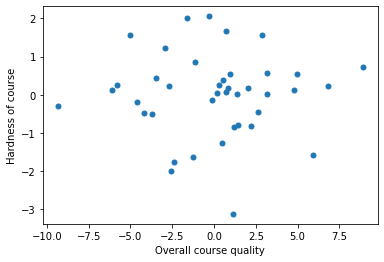

In [11]:
# 8. Visualize our data in the new coordinate system

# For instance, let's say the school wants to figure out which courses are
# good or needlessly hard, we can now look at that

plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5)
plt.xlabel('Overall course quality')
plt.ylabel('Hardness of course')
plt.show()

In [ ]:
# In this sense, PCA can help in decision making - are there some classes
# that are under/over-performing, given their characteristics?
# If we had more than 40 courses, looking at the 3rd dimension would be
# interesting too. As is, it is a bit sparse.